<a href="https://colab.research.google.com/github/Drinkler/Yield-Prediction/blob/main/Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/hajir-almahdi/Machine-Learning-Capstone-Project
# https://towardsdatascience.com/predicting-crops-yield-machine-learning-nanodegree-capstone-project-e6ec9349f69

In [1]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define url to data
resource_folder = 'https://raw.githubusercontent.com/Drinkler/Yield-Prediction/main/res'

pesticides_url = '{}/pesticides.csv?token=AJLCGM6CS5TGAH4T4KHLO5LAMQ64O'.format(resource_folder)
rainfall_url = '{}/rainfall.csv?token=AJLCGM7LE7SGVIXQYPNLLD3AMQ64Q'.format(resource_folder)
temp_url = '{}/temp.csv?token=AJLCGM5WJDLMRNI45SLWFZLAMQ66G'.format(resource_folder)
yield_url = '{}/yield.csv?token=AJLCGM6CZIYEGRYTZJS3H5TAMQ66M'.format(resource_folder)

In [3]:
# Load data
pesticides_data = pd.read_csv(pesticides_url, sep=',')
rainfall_data = pd.read_csv(rainfall_url, sep=',')
temp_data = pd.read_csv(temp_url, sep=',')
yield_data = pd.read_csv(yield_url, sep=',')

#Data Preparation


In [5]:
rainfall_data.head(12)

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
5,16.64650,1901,Jun Average,Afghanistan,AFG
6,7.38656,1901,Jul Average,Afghanistan,AFG
7,0.59306,1901,Aug Average,Afghanistan,AFG
8,4.82593,1901,Sep Average,Afghanistan,AFG
9,11.49720,1901,Oct Average,Afghanistan,AFG


In [7]:
rainfall_data.columns

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [11]:
rdf = rainfall_data.groupby([' Year', ' Country']).sum()
rdf

Rainfall - (MM)
 Year  Country                     
1901   Afghanistan        250.92364
       Albania           1244.13740
       Algeria            113.45278
       Andorra            871.31150
       Angola             931.01022
...                             ...
2016   Venezuela         1844.70330
       Vietnam           1988.86180
       Yemen              171.48137
       Zambia             803.47810
       Zimbabwe           455.13295

[22736 rows x 1 columns]

In [ ]:
temp = pd.read_csv('/content/temp.csv', sep=',')
temp.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
5,22.17270,1901,Jun Average,Afghanistan,AFG
6,25.37870,1901,Jul Average,Afghanistan,AFG
7,23.66520,1901,Aug Average,Afghanistan,AFG
8,19.46550,1901,Sep Average,Afghanistan,AFG
9,11.28370,1901,Oct Average,Afghanistan,AFG


In [ ]:
temp.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [ ]:
radf = temp.groupby([' Year', ' Country']).mean()
radf.unstack()

for col in radf['Temperature - (Celsius)']:
  print(col)

In [ ]:
radf['Temperature - (Celsius)'].unstack(level=0)

Year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13.172872,13.342649,12.006417,12.531729,12.267143,12.827208,12.129302,12.517842,13.040823,12.369605,12.298866,12.883983,12.713386,13.426274,14.074119,12.501984,13.122933,12.209911,12.155890,11.565225,12.475152,13.087912,12.003554,12.260782,12.893280,12.701889,12.710254,12.139399,11.860022,11.812103,12.126244,12.424820,12.488305,12.023278,12.066191,12.792795,12.102959,12.842299,12.921518,13.507337,...,13.496869,13.094233,12.957953,13.309065,13.346817,12.286150,13.210195,12.808911,13.341811,12.741297,13.522105,14.005483,12.653132,13.484385,12.894488,12.544548,12.977138,13.080018,13.040895,12.750267,12.867905,13.439933,14.073921,13.773887,14.008403,13.815448,13.313425,14.154191,13.382192,14.167483,13.511141,13.752817,13.782173,14.105874,13.728162,12.976281,14.016803,13.647967,13.866922,14.513565
Albania,11.030938,11.033575,11.397395,11.413519,11.156557,11.069992,10.971668,10.700088,11.077043,11.479689,11.423875,10.917218,11.137172,10.725857,11.478202,12.045153,11.282152,11.206637,11.179719,11.511999,11.366887,11.234145,12.107528,11.199706,11.527972,12.075039,12.346587,11.776709,10.934192,11.993516,11.316037,11.233643,10.370869,12.201158,11.502587,11.802540,12.032798,11.486174,11.657869,10.201777,...,11.692505,10.805689,11.646156,10.758552,11.213971,11.605630,11.194909,11.051521,11.339359,11.552387,11.438608,11.768906,11.328223,12.051221,11.037649,11.563868,11.595673,12.526790,11.345310,11.160539,11.411141,11.968658,12.252662,12.519675,12.256179,12.335653,12.138401,11.884031,11.405861,11.772879,12.474265,12.600577,12.435142,12.390449,12.169143,12.663003,12.748113,12.704040,12.685259,12.722338
Algeria,22.290008,22.313100,22.222208,22.530408,22.056825,22.091683,21.841300,22.117642,22.041592,22.029975,22.161117,22.222058,22.338858,22.140200,21.824842,21.695292,21.500992,21.435442,22.068392,22.355275,22.115533,22.081883,21.926226,22.654392,21.816667,22.822167,22.559092,22.550100,22.245825,22.904817,22.867275,22.102708,22.435067,22.109358,22.575200,22.495367,23.156200,22.658858,22.399383,22.726633,...,22.664658,22.625450,22.856158,22.609933,22.793692,22.824308,23.020600,22.557875,22.884908,22.657542,23.394442,23.062283,23.158550,23.426192,22.513458,22.441875,22.825708,23.251625,23.361300,23.100625,23.492217,23.348292,23.473575,23.396817,23.784842,23.485733,23.709017,23.380900,23.413233,23.670150,23.439533,23.282325,23.763258,24.085758,23.645283,23.631542,23.331608,23.877250,23.656875,24.067067
Andorra,9.960649,10.336782,10.327559,10.871637,10.094608,10.378843,10.282323,10.409638,9.808048,10.179645,10.884674,10.254153,10.756498,10.267803,10.247578,10.537604,9.734464,10.174654,9.918082,10.621071,11.001931,10.188938,10.869522,10.708636,10.043236,11.270723,11.039991,11.259527,10.644852,11.161795,10.487749,10.477479,10.634100,10.906136,10.426108,10.485973,11.176072,10.440419,10.445239,10.201062,...,10.829761,10.605790,10.894543,10.339724,11.085997,11.752688,11.387527,10.515110,10.666902,10.989105,11.030187,11.396098,12.103410,12.006646,11.188148,11.225924,11.052378,12.263018,12.021568,11.422869,12.550163,11.730381,11.969698,12.186416,11.902153,12.104243,12.414216,11.792602,11.411372,12.447481,11.851174,11.741287,12.268427,11.141372,12.653303,12.028117,11.583379,12.831938,12.573667,12.442113
Angola,21.365725,21.465800,21.485933,21.170525,21.419367,21.081292,21.046442,21.305150,21.315808,21.271492,21.389983,21.438750,21.492858,21.407992,21.341875,21.324692,21.390625,20.839100,21.002033,21.345667,21.344233,21.697733,21.403275,21.407958,20.9981


##Yield Data

In [ ]:
yield_data.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Maize,1961,hg/ha,14000
1,Crops,Afghanistan,Yield,Maize,1962,hg/ha,14000
2,Crops,Afghanistan,Yield,Maize,1963,hg/ha,14260
3,Crops,Afghanistan,Yield,Maize,1964,hg/ha,14257
4,Crops,Afghanistan,Yield,Maize,1965,hg/ha,14400


In [ ]:
yield_data.tail()

,Domain,Area,Element,Item,Year,Unit,Value
58760,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
58761,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
58762,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
58763,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379
58764,Crops,Zimbabwe,Yield,Wheat,2019,hg/ha,15891


In [ ]:
yield_data.describe()

,Year,Value
count,58765.000000,58765.000000
mean,1991.205343,63334.130894
std,16.952487,69854.898620
min,1961.000000,0.000000
25%,1977.000000,15738.000000
50%,1992.000000,37315.000000
75%,2006.000000,87439.000000
max,2019.000000,1000000.000000


In [ ]:
yield_data = yield_data.rename(index=str, columns={"Value": "yield_per_year"})
yield_data.head()

,Domain,Area,Element,Item,Year,Unit,yield_per_year
0,Crops,Afghanistan,Yield,Maize,1961,hg/ha,14000
1,Crops,Afghanistan,Yield,Maize,1962,hg/ha,14000
2,Crops,Afghanistan,Yield,Maize,1963,hg/ha,14260
3,Crops,Afghanistan,Yield,Maize,1964,hg/ha,14257
4,Crops,Afghanistan,Yield,Maize,1965,hg/ha,14400


For further analysis we only need the area, item, year and yield columns

In [ ]:
#yield_data = yield_data.drop(['Year Code', 'Element Code', 'Element', 'Area Code', 'Domain Code', 'Domain', 'Unit', 'Item Code'], axis=1)
#yield_data.head()

In [ ]:
temp = yield_data.drop(['Area'], axis=1)
temp

,Domain,Element,Item,Year,Unit,yield_per_year
0,Crops,Yield,Maize,1961,hg/ha,14000
1,Crops,Yield,Maize,1962,hg/ha,14000
2,Crops,Yield,Maize,1963,hg/ha,14260
3,Crops,Yield,Maize,1964,hg/ha,14257
4,Crops,Yield,Maize,1965,hg/ha,14400
...,...,...,...,...,...,...
58760,Crops,Yield,Wheat,2015,hg/ha,20486
58761,Crops,Yield,Wheat,2016,hg/ha,19013
58762,Crops,Yield,Wheat,2017,hg/ha,17542
58763,Crops,Yield,Wheat,2018,hg/ha,16379


In [ ]:
tdf = temp.groupby(['Year', 'Item']).mean()
tdf

yield_per_year
Year Item                                
1961 Cassava                 81561.281250
     Maize                   14550.900000
     Plantains and others    72000.547619
     Potatoes                97603.434426
     Rice, paddy             21450.146789
...                                   ...
2019 Sorghum                 27701.281818
     Soybeans                18379.959184
     Sweet potatoes         113249.250000
     Wheat                   33360.459677
     Yams                    93373.555556

[590 rows x 1 columns]

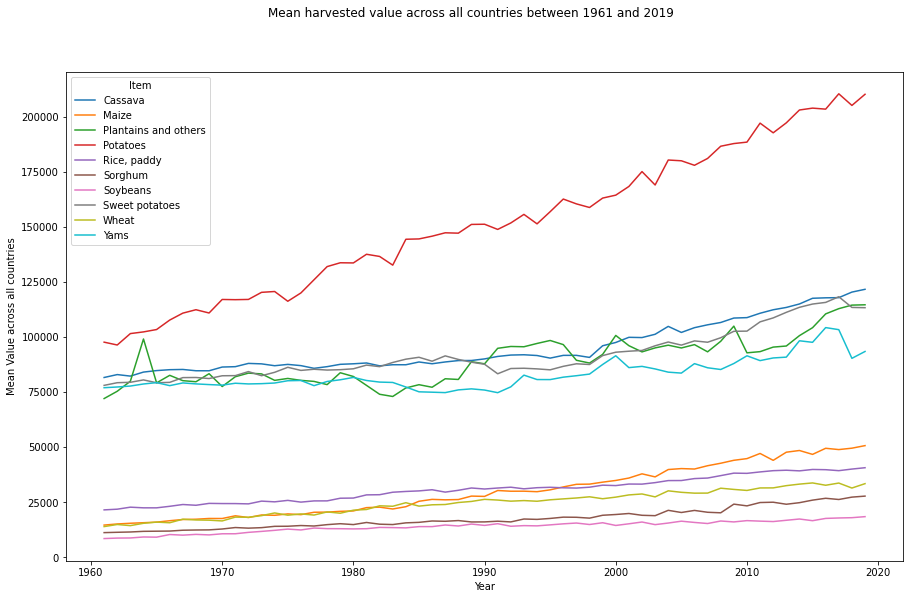

In [ ]:
# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

tdf['yield_per_year'].unstack().plot(ax=ax)
ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

In [ ]:
yield_data['Item'].value_counts().to_frame().reset_index()

,index,Item
0,Maize,8631
1,Potatoes,7876
2,"Rice, paddy",6469
3,Sweet potatoes,6356
4,Wheat,6160
5,Cassava,5718
6,Sorghum,5511
7,Soybeans,4192
8,Yams,3150
9,Plantains and others,2654


In [ ]:
yield_data['Item']

0        Maize
1        Maize
2        Maize
3        Maize
4        Maize
         ...  
56712    Wheat
56713    Wheat
56714    Wheat
56715    Wheat
56716    Wheat
Name: Item, Length: 56717, dtype: object

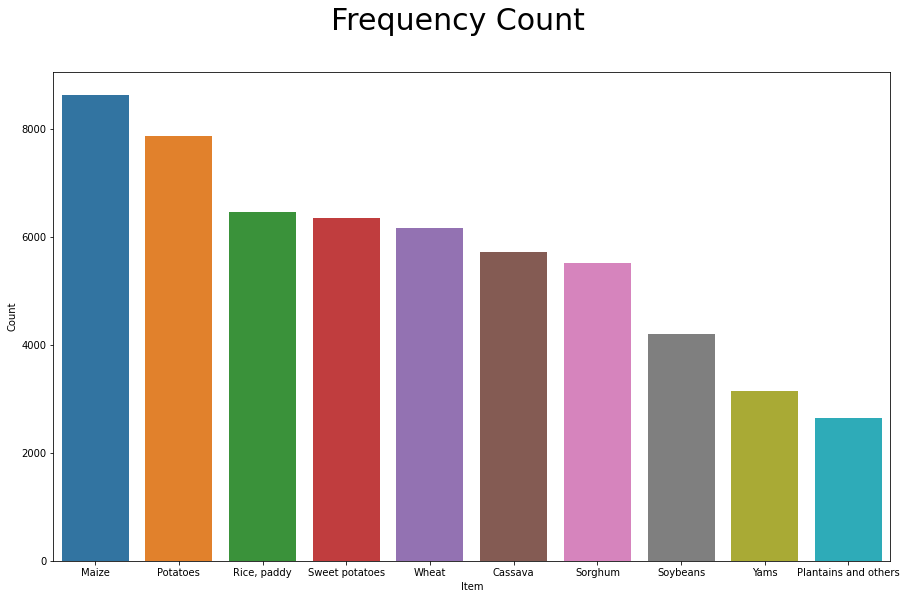

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)


df = yield_data['Item'].value_counts().to_frame().reset_index()
sns.barplot(x='index', y='Item', data=df, orient='v', ax=axs)
axs.set_xlabel('Item')
axs.set_ylabel('Count')


fig.show()

In [ ]:
yield_data.describe()

,Year,yield_per_year
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [ ]:
yield_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            56717 non-null  object
 1   Item            56717 non-null  object
 2   Year            56717 non-null  int64 
 3   yield_per_year  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            56717 non-null  object
 1   Item            56717 non-null  object
 2   Year            56717 non-null  int64 
 3   yield_per_year  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


## Rainfall data

In [ ]:
rainfall_data.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [ ]:
rainfall_data = rainfall_data.rename(index=str, columns={" Area": "Area"})

In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


Convert `average_rain_fall_mm_per_year` from `object` to `float`

In [ ]:
rainfall_data['average_rain_fall_mm_per_year'] = pd.to_numeric(rainfall_data['average_rain_fall_mm_per_year'], errors='coerce')
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [ ]:
rainfall_data = rainfall_data.dropna()

In [ ]:
rainfall_data.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [ ]:
df = pd.merge(yield_data, rainfall_data, on=['Year', 'Area'])
df.head()

,Area,Item,Year,yield_per_year,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [ ]:
df.describe()

,Year,yield_per_year,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


##Pesticides Data

In [ ]:
pesticides_data.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
pesticides_data = pesticides_data.rename(index=str, columns={"Value": "pesticides_tonnes"})
pesticides_data = pesticides_data.drop(['Element', 'Domain', 'Unit', 'Item'], axis=1)
pesticides_data.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [ ]:
pesticides_data.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [ ]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [ ]:
df = pd.merge(df, pesticides_data, on=['Year', 'Area'])
df.shape

(18949, 6)

In [ ]:
df.head(3)

,Area,Item,Year,yield_per_year,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0


##Temperature data

In [ ]:
temp_data.head(3)

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67


In [ ]:
temp_data.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [ ]:

temp_data = temp_data.rename(index=str, columns={"year": "Year", "country":'Area'})
temp_data.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
df = pd.merge(df, temp_data, on=['Area','Year'])
df.head()

,Area,Item,Year,yield_per_year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.shape

(28242, 7)

In [ ]:
df.describe()

,Year,yield_per_year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
yield_per_year                   0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

We have verified that there are no empty values left.

#Data Exploration

**df** is our final dataframe, containing all the neccessary data



In [ ]:
df.groupby('Item').count()

,Area,Year,yield_per_year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [ ]:
df.describe()

,Year,yield_per_year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


We can observe a high variance in the values for each column

In [ ]:
df['Area'].nunique()

101

With the following command we can return the unique values of countries in this dataset

```
# df['Area'].nunique()
```
We receive 101 unique countries. We will now order the 10 most productive ones


In [ ]:
df.groupby(['Area'],sort=True)['yield_per_year'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: yield_per_year, dtype: int64

In [ ]:
df.groupby(['Item','Area'],sort=True)['yield_per_year'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: yield_per_year, dtype: int64

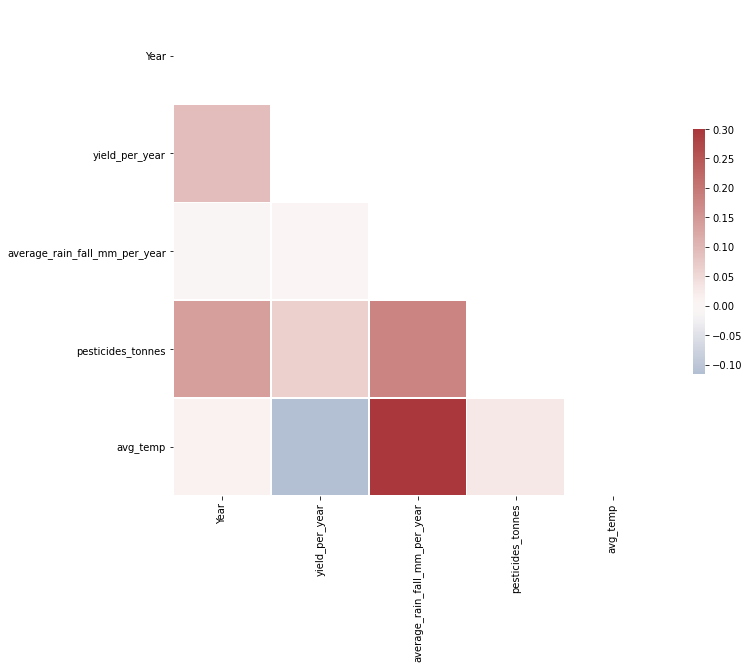

In [ ]:
corr = df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Data Preprocessing

In [ ]:
df.head(3)

,Area,Item,Year,yield_per_year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37


In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(df, columns=['Area', 'Item'], prefix=['Country', 'Item'])
features = df_onehot.loc[:, df_onehot.columns != 'yield_per_year']
label = df_onehot['yield_per_year']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
features = features.drop(['Year'], axis=1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: float64(3), uint8(111)
memory usage: 3.9 MB


In [ ]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Training Data

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [ ]:
df.to_csv('yield_prediction_data.csv')

# Model Selection

In [ ]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [ ]:
model_train=list(map(compare_models,models))

In [ ]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8965768919264416]
['RandomForestRegressor', 0.6842532317855172]
['SVR', -0.19543203867357395]
['DecisionTreeRegressor', 0.9595331355281662]


In [ ]:
df_onehot = df_onehot.drop(['Year'], axis=1)

In [ ]:
df_onehot.head()

,yield_per_year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=df_onehot.loc[:, df_onehot.columns != 'yield_per_year'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [ ]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.183443,0.110716,0.542078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.458451,0.000413,0.627257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183443,0.106159,0.518228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.224154,0.890971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.458451,0.000355,0.625213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [ ]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.110716,0.542078,Spain,"Rice, paddy"
1,0.458451,0.000413,0.627257,Madagascar,Wheat
2,0.183443,0.106159,0.518228,Spain,Sorghum
3,1.000000,0.224154,0.890971,Colombia,Potatoes
4,0.458451,0.000355,0.625213,Madagascar,Sweet potatoes


In [ ]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["yield_per_year"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.927208
Maize                   0.893573
Plantains and others    0.777890
Potatoes                0.908493
Rice, paddy             0.893643
Sorghum                 0.805592
Soybeans                0.846623
Sweet potatoes          0.847431
Wheat                   0.921496
Yams                    0.929207
dtype: float64

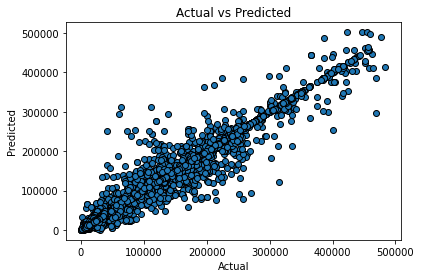

In [ ]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [ ]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Item
Cassava                 0.926263
Maize                   0.892886
Plantains and others    0.766427
Potatoes                0.907930
Rice, paddy             0.892758
Sorghum                 0.803850
Soybeans                0.845378
Sweet potatoes          0.846010
Wheat                   0.920948
Yams                    0.926723
dtype: float64